In [30]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def cumulative_average(numbers):
    numbers = np.array(numbers)
    cum_sum = np.cumsum(numbers)
    indices = np.arange(1, len(numbers) + 1)
    cum_avg = cum_sum / indices
    return cum_avg.tolist()

In [32]:
path = './acdm_thesis_results_no_noise_pkl/state_avg/'

In [42]:
files_in_sa = os.listdir(path)
files_in_sa.sort()

In [43]:
labels = []

for filename in files_in_sa:
    parts = filename.split('_')
    labels.append(parts[-2])

In [44]:
labels

['20240317-191711',
 '20240317-191957',
 '20240317-192003',
 '20240317-192010',
 '20240317-203048',
 '20240318-011929',
 '20240318-015147',
 '20240318-022630',
 '20240318-023901',
 '20240318-055342',
 '20240318-075409',
 '20240318-082602',
 '20240318-093413',
 '20240318-105943',
 '20240318-130218',
 '20240318-174308',
 '20240318-232026']

In [45]:
metrics_list = []
for i in range(len(files_in_sa)):
    file_path = os.path.join(path, files_in_sa[i])
    metrics_list.append(pickle.load(open(file_path, 'rb')))
    #print(file_path)

In [46]:
rollout_mean=[]
rollout_std=[]

    
#metrics_list is a list containing all the rollouts of each model, Each entry of the list corresponds 
#to a different model. Each entry contains a dictionary of rollouts. Each rollout contains a dictionary of metrics.
    
for metrics in metrics_list: 
    cumulative_average_of_mse = []
    
    cumulative_average_ekin = []     
    
    cumulative_average_of_sinkhorn = []
    
    #this loop is executed once per model
    for rollout in metrics.values(): #metrics.keys()=['rollout_0', 'rollout_1',...]; 
                                     #metrics.values()=[{rollout-0: ekin,mse,mse1,mse5,mse10,sinkhorn}, {rollout-1: ekin,mse,mse1,mse5,mse10,sinkhorn}, ...]
        for k, v in rollout.items(): #key 'k' contains mse1, mse5, mse10, mse20, e_kin, sinkhorn
            #determine the cumulative average of the metrics
            if k =='mse': #v has a shape of 20, cumulative average of mse also has a shape of 20
                cumulative_average_of_mse.append(cumulative_average(v))
            
            if k =='e_kin': 
                squared_errors = (v["predicted"] - v["target"])**2 
                cumulative_average_ekin.append(cumulative_average(squared_errors))
            
            if k =='sinkhorn':
                cumulative_average_of_sinkhorn.append(cumulative_average(v))

    cumulative_average_of_mse = np.array(cumulative_average_of_mse)  #shape (x,20). x is the number of rollouts and 20 is the number of time steps
    cumulative_average_ekin = np.array(cumulative_average_ekin) #(x,20)
    cumulative_average_of_sinkhorn = np.array(cumulative_average_of_sinkhorn) #(x,20)

    ## FOR MSE POSITION 
    rollout_mean_position = np.mean(cumulative_average_of_mse, axis=0) #mean across rollouts,(x, 20) --> shape (20,)
    rollout_std_position = np.std(cumulative_average_of_mse, axis=0) #std across rollouts, (x, 20) --> shape (20,)

    #### FOR EKIN
    rollout_mean_ekin = np.mean(cumulative_average_ekin, axis=0) #mean across rollouts, shape (x, 19) --> (19,)
    rollout_std_ekin = np.std(cumulative_average_ekin, axis=0) #std across rollouts shape (x, 19) --> (19,)

    #### FOR SINKHORN
    rollout_mean_sinkhorn = np.mean(cumulative_average_of_sinkhorn, axis=0) #mean across rollouts, shaoe (20,)
    rollout_std_sinkhorn = np.std(cumulative_average_of_sinkhorn, axis=0) #std across rollouts, shape (20,)

    #each entry of the lists below are for a particular model
    rollout_mean.append([rollout_mean_position,rollout_mean_ekin, rollout_mean_sinkhorn])  
    rollout_std.append([rollout_std_position, rollout_std_ekin, rollout_std_sinkhorn])


In [54]:
#print the cumulatve average of mse , ekin and sinkhorn for each model
for i in range(len(rollout_mean)):
    print(labels[i])
    #middle index 0 is for mse, 1 is for ekin, 2 is for sinkhorn
    print(f"cumulative MSE_5 rollout mean {rollout_mean[i][0][4]:.1e}")
    print(f"cumulative MSE_5 rollout std {rollout_std[i][0][4]:.1e}")
    print(f"cumulative MSE_20 rollout mean {rollout_mean[i][0][19]:.1e}")
    print(f"cumulative MSE_20 rollout std {rollout_std[i][0][19]:.1e}")
    print(f"cumulative Ekin rollout mean {rollout_mean[i][1][18]:.1e}")
    print(f"cumulative Ekin rollout std {rollout_std[i][1][18]:.1e}")
    print(f"cumulative Sinkhorn rollout mean {rollout_mean[i][2][19]:.1e}")
    print(f"cumulative Sinkhorn rollout std {rollout_std[i][2][19]:.1e}")

    print("\n")

20240317-191711
cumulative MSE_5 rollout mean 2.2e-06
cumulative MSE_5 rollout std 1.7e-07
cumulative MSE_20 rollout mean 5.7e-05
cumulative MSE_20 rollout std 6.3e-06
cumulative Ekin rollout mean 1.0e-04
cumulative Ekin rollout std 1.1e-04
cumulative Sinkhorn rollout mean 8.4e-06
cumulative Sinkhorn rollout std 1.9e-06


20240317-191957
cumulative MSE_5 rollout mean 2.6e-06
cumulative MSE_5 rollout std 2.0e-07
cumulative MSE_20 rollout mean 6.6e-05
cumulative MSE_20 rollout std 7.4e-06
cumulative Ekin rollout mean 1.0e-04
cumulative Ekin rollout std 1.1e-04
cumulative Sinkhorn rollout mean 1.0e-05
cumulative Sinkhorn rollout std 2.4e-06


20240317-192003
cumulative MSE_5 rollout mean 8.3e-07
cumulative MSE_5 rollout std 1.0e-07
cumulative MSE_20 rollout mean 4.5e-05
cumulative MSE_20 rollout std 5.2e-06
cumulative Ekin rollout mean 4.4e-05
cumulative Ekin rollout std 4.5e-05
cumulative Sinkhorn rollout mean 4.5e-06
cumulative Sinkhorn rollout std 1.2e-06


20240317-192010
cumulative M

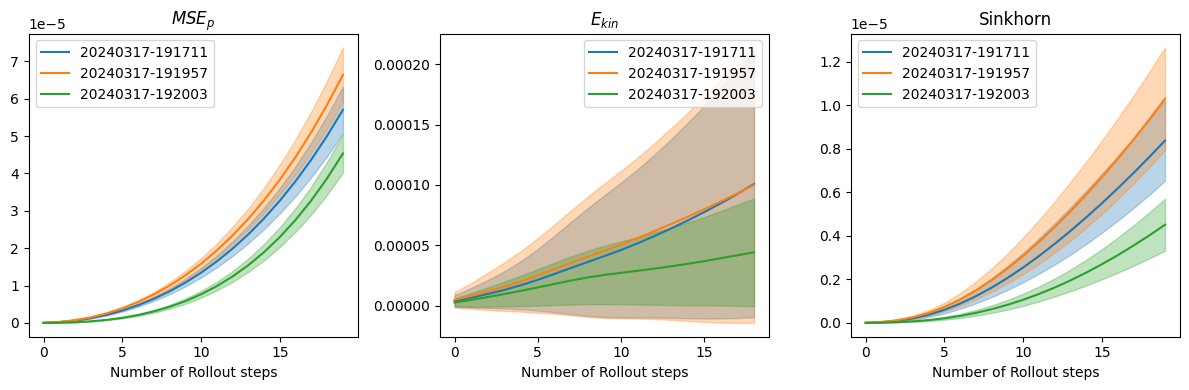

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for j in range(3):# runs as many times as the number of files /models
    for i,m in enumerate(['$MSE_p$', '$E_{kin}$', 'Sinkhorn']): 
        ax[i].plot(np.arange(len(rollout_mean[j][i])),rollout_mean[j][i], label=labels[j], color=plt.cm.tab10.colors[j])        
        ax[i].fill_between(np.arange(len(rollout_mean[j][i])),y1=rollout_mean[j][i] - rollout_std[j][i], 
                        y2=rollout_mean[j][i] + rollout_std[j][i], 
                        alpha=0.3,label="", color=plt.cm.tab10.colors[j])
        ax[i].set_title(m)
        ax[i].set_xlabel('Number of Rollout steps')
        ax[i].legend()
        fig.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def random_color(value):
    colormap = cm.get_cmap('jet')  # Choose a colormap, such as 'viridis'
    color = colormap(value)
    return color

# Example usage:
num_values = 5
random_values = np.random.rand(num_values)  # Generate random values
for value in random_values:
    color = random_color(value)
    print("Random value:", value, "Mapped color:", color)

# Plot example
plt.figure()
for value in random_values:
    color = random_color(value)
    plt.scatter(value, value, color=color)
plt.xlabel('Random Value')
plt.ylabel('Random Value')
plt.title('Random Colors')
plt.show()
